# Sheet 1

In [10]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

## 1 Principal Component Analysis
### (a)

In [2]:
# TODO: implement PCA (fill in the blanks in the function below)

def pca(data, n_components=None):
    """
    Principal Component Analysis on a p x N data matrix.
    
    Parameters
    ----------
    data : np.ndarray
        Data matrix of shape (p, N).
    n_components : int, optional
        Number of requested components. By default returns all components.
        
    Returns
    -------
    np.ndarray, np.ndarray
        the pca components (shape (n_components, p)) and the projection (shape (n_components, N))

    """
    # set n_components to p by default
    n_components = data.shape[0] if n_components is None else n_components
    assert n_components <= data.shape[0], f"Got n_components larger than dimensionality of data!"
    
    # center the data

    n = data.shape[1]
    X = data - 1/n * data @ np.ones((n,n))
    
    # compute X times X transpose

    XX = X @ X.T
    
    # compute the eigenvectors and eigenvalues

    w, v = np.linalg.eig(XX)
    
    # sort the eigenvectors by eigenvalue and take the n_components largest ones

    w, v = zip(*sorted(zip(w,v.T), reverse=True))
    components = np.array(v[:n_components])
    
    # compute X_projected, the projection of the data to the components

    X_projected = X.T @ components.T

    return components, X_projected.T  # return the n_components first components and the pca projection of the data


In [3]:
# Example data to test your implementation 
# All the asserts on the bottom should go through if your implementation is correct

data = np.array([
    [ 1,  0,  0, -1,  0,  0],
    [ 0,  3,  0,  0, -3,  0],
    [ 0,  0,  5,  0,  0, -5]
], dtype=np.float32)


# add a random offset to all samples. it should not affect the results
data += np.random.randn(data.shape[0], 1)

n_components = 2
components, projection = pca(data, n_components=n_components)  # apply your implementation

# the correct results are known (up to some signs)
true_components = np.array([[0, 0, 1], [0, 1, 0]], dtype=np.float32)
true_projection = np.array([
    [ 0,  0,  5,  0,  0, -5],
    [ 0,  3,  0,  0, -3,  0]
], dtype=np.float32)

# check that components match, up to sign
assert isinstance(components, np.ndarray), f'Expected components to be numpy array but got {type(components)}'
assert components.shape == true_components.shape, f'{components.shape}!={true_components.shape}'
assert np.allclose(np.abs(components * true_components).sum(1), np.ones(n_components)), f'Components not matching'

# check that projections agree, taking into account potentially flipped components
assert isinstance(projection, np.ndarray), f'Expected projection to be numpy array but got {type(projection)}'
assert projection.shape == (n_components, data.shape[1]), f'Incorrect shape of projection: Expected {(n_components, data.shape[1])}, got {projection.shape}'
assert np.allclose(projection, true_projection * (components * true_components).sum(1, keepdims=True), atol=1e-6), f'Projections not matching'

print('Test successful!')

Test successful!


### (b)

Load the data (it is a subset of the data at https://opendata.cern.ch/record/4910#)

In [4]:
features = np.load('data/dijet_features.npy')
labels = np.load('data/dijet_labels.npy')
label_names = ['b', 'c', 'q']  # bottom, charm or light quarks

print(f'{features.shape=}, {labels.shape=}')  # print the shapes

# TODO: print how many samples of each class are present in the data (hint: numpy.unique)

print(f"# of samples of each class ({np.unique(labels, return_counts = True)[0]}) : {np.unique(labels, return_counts = True)[1]}" )


features.shape=(116, 2233), labels.shape=(2233,)
# of samples of each class ([0. 1. 2.]) : [999 864 370]


Normalize the data

Text(0.5, 1.0, 'Raw features')

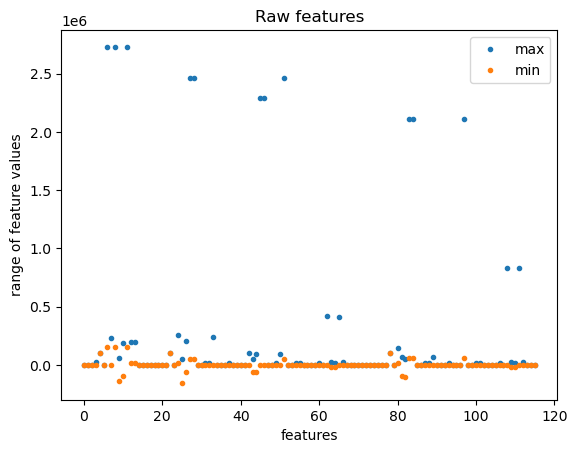

In [5]:
# TODO: report range of features and normalize the data to zero mean and unit variance
max = np.max(features, axis=1)
min = np.min(features, axis=1)

plt.plot(np.arange(0,116,1), max, ".", label = "max")
plt.plot(np.arange(0,116,1), min, ".", label = "min")
plt.legend()
plt.xlabel("features")
plt.ylabel("range of feature values")
plt.title("Raw features")

Text(0.5, 1.0, 'Normalized features')

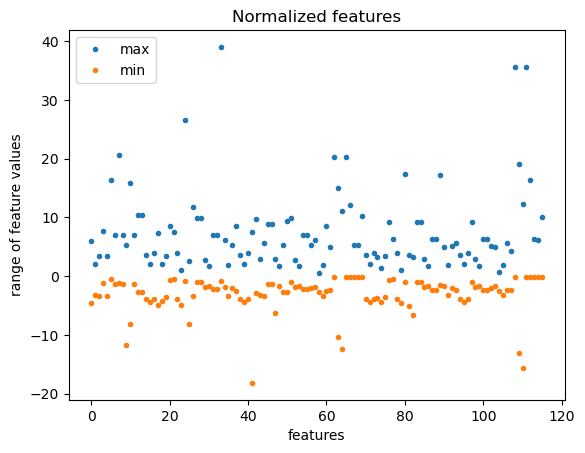

In [6]:
means = np.mean(features, axis=1)
variances = np.std(features, axis=1)

normalized_features = ((features.T - means) / variances).T

max = np.max(normalized_features, axis=1)
min = np.min(normalized_features, axis=1)

plt.plot(np.arange(0,116,1), max, ".", label = "max")
plt.plot(np.arange(0,116,1), min, ".", label = "min")
plt.legend()
plt.xlabel("features")
plt.ylabel("range of feature values")
plt.title("Normalized features")


### (c)
Compute a 2D PCA projection and make a scatterplot of the result, once without color, once coloring the dots by label. Interpret your results.

In [7]:
# TODO: apply PCA as implemented in (a)
components, X_projected = pca(normalized_features, 2)

c:\Users\kusch\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\kusch\anaconda3\Lib\site-packages\matplotlib\collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0.5, 1.0, 'projected features uncolored')

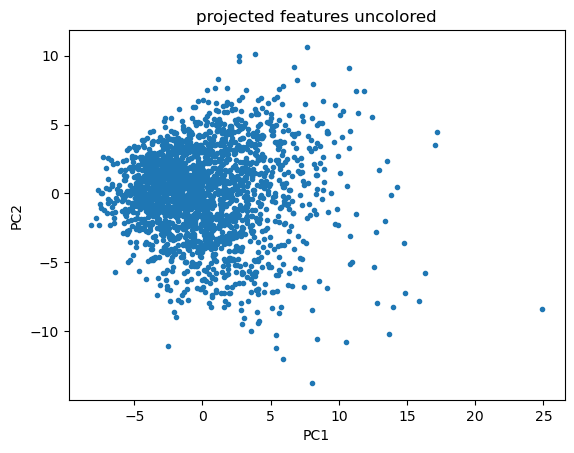

In [8]:
# TODO: make a scatterplot of the PCA projection

plt.scatter(X_projected[0], X_projected[1], marker = ".")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("projected features uncolored")

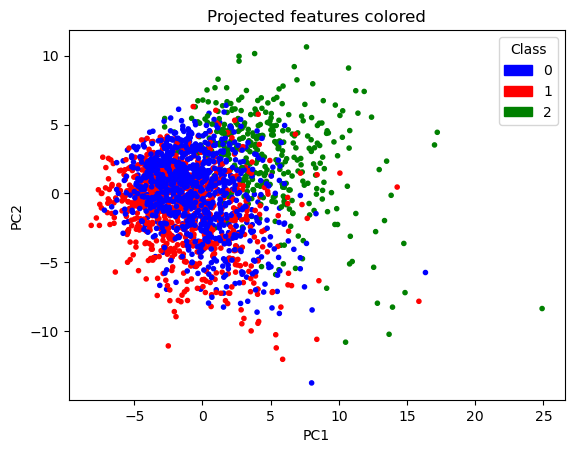

In [11]:
color_box = ["blue", "red", "green"]
colors = [] 
for label in labels:
    colors.append(color_box[int(label)])

plt.scatter(X_projected[0], X_projected[1], marker = ".", color = colors)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projected features colored")

blue = mpatches.Patch(color='blue', label='0')
red = mpatches.Patch(color='red', label='1')
green = mpatches.Patch(color='green', label='2')

plt.legend(handles=[blue, red, green], title = "Class")

## 2 Nonlinear Dimension Reduction

In [16]:
import umap ### du musst umap-learn installieren

In [17]:
# if you have not done 1(b) yet, you can load the normalized features directly:
features = np.load('data/dijet_features_normalized.npy')
labels = np.load('data/dijet_labels.npy')
label_names = ['b', 'c', 'q']  # bottom, charm or light quarks

### (a)

In [25]:
# TODO: Apply umap on the normalized jet features from excercise 1. It will take a couple of seconds.
# note: umap uses a different convention regarding the feature- and sample dimension, N x p instead of p x N!

reducer = umap.UMAP()

embedding = reducer.fit_transform(features.T)
embedding.shape

(2233, 2)

Text(0.5, 1.0, 'UMAP projection of the features')

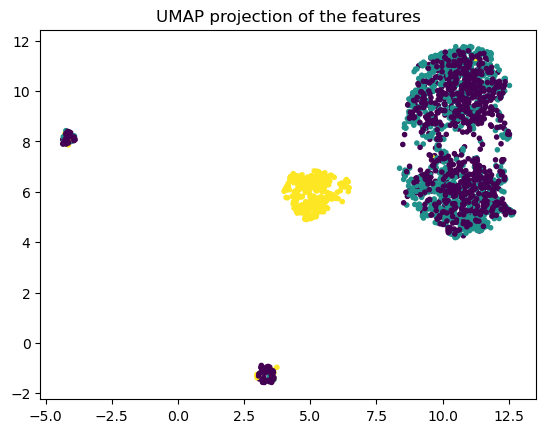

In [31]:
# TODO: make a scatterplot of the UMAP projection

plt.scatter(embedding[:, 0], embedding[:, 1], marker=".", c=labels)
#plt.scatter(embedding[0], embedding[1], marker=".", c=labels)
plt.title('UMAP projection of the features')


# TODO: make a scatterplot, coloring the dots by their label and including a legend with the label names

### (b)

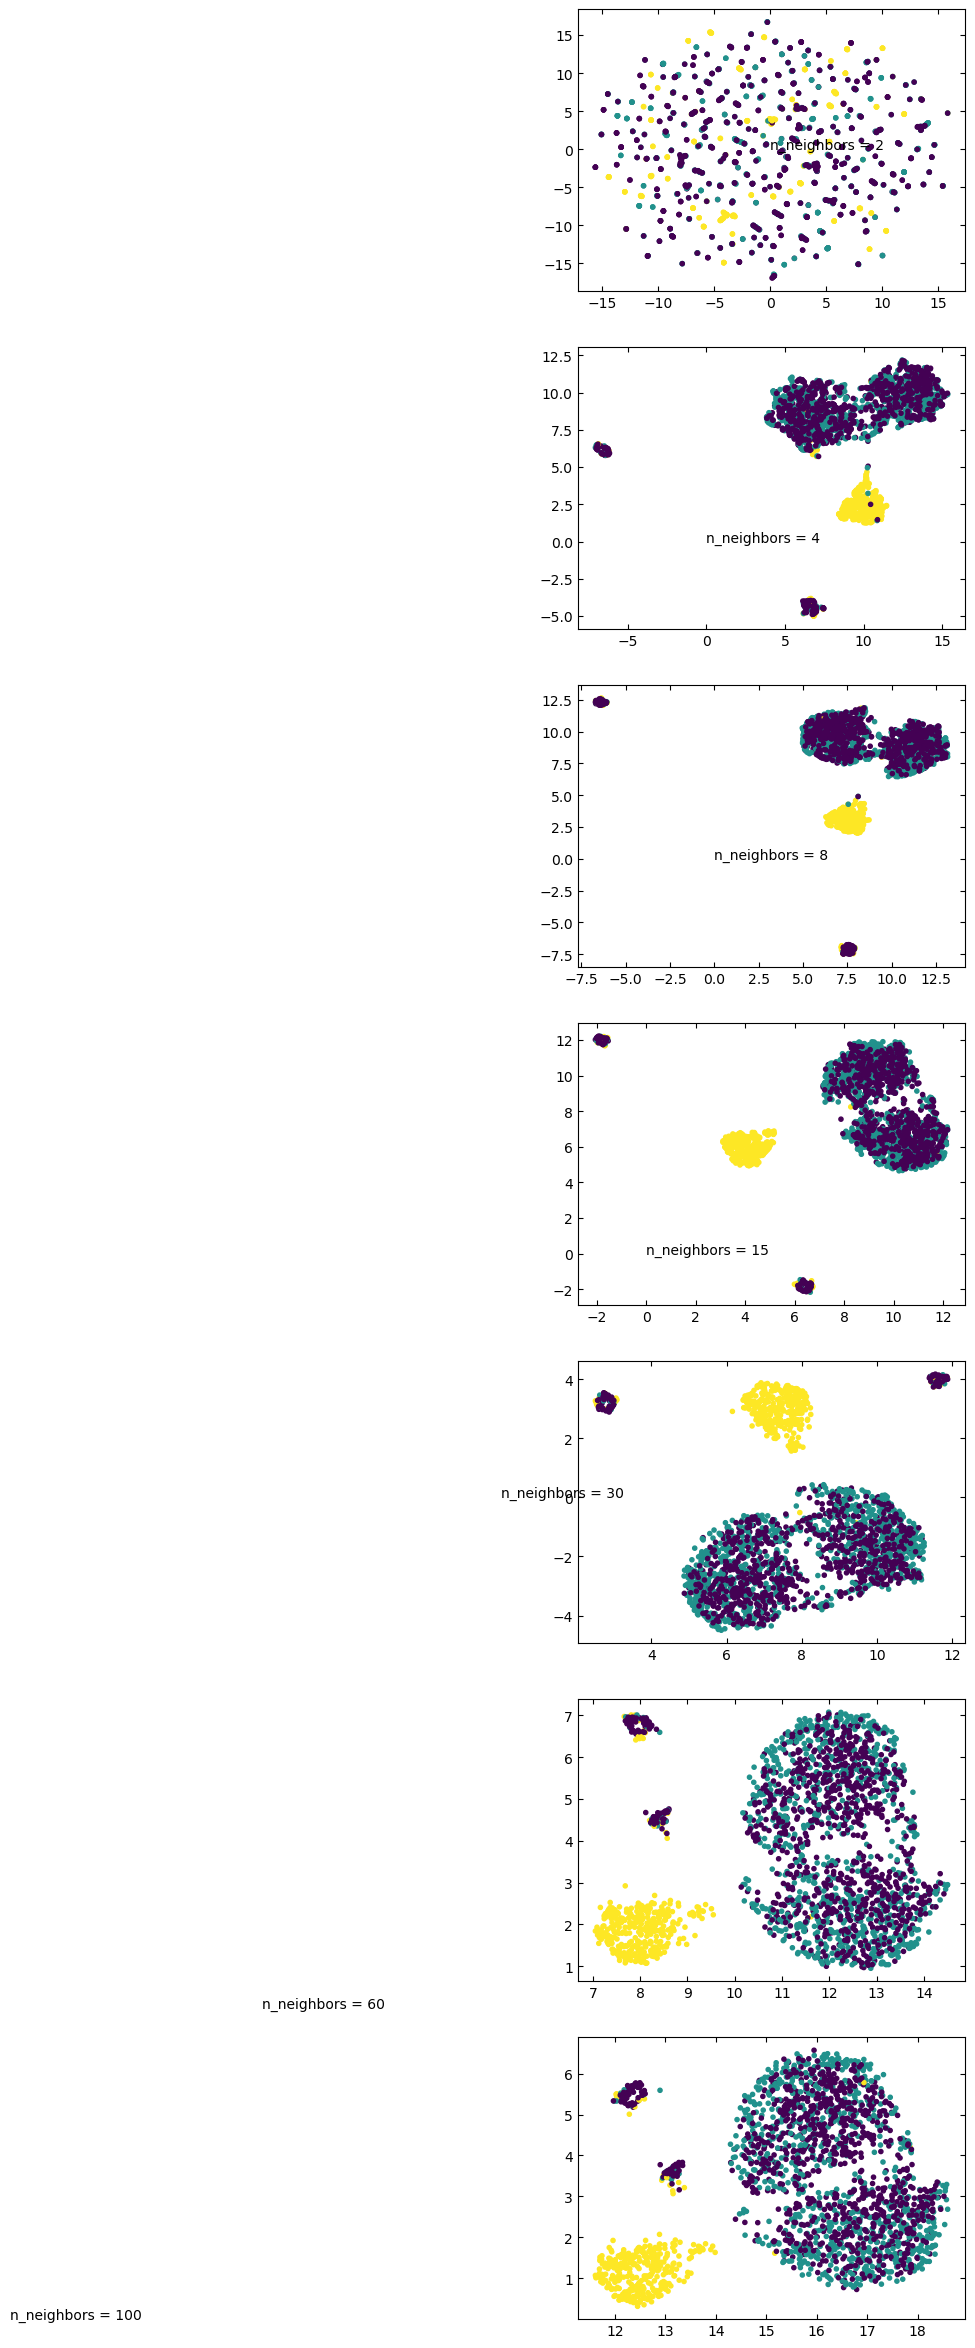

In [38]:
embedding_list = []

fig, axs = plt.subplots(7, figsize = (5, 30))

n_neighbors_list = [2, 4, 8, 15, 30, 60, 100]

for i, n_neighbors in enumerate(n_neighbors_list):
    # TODO: repeat the above, varying the n_neighbors parameter of UMAP
    reducer = umap.UMAP(n_neighbors=n_neighbors)
    embedding = reducer.fit_transform(features.T)
    axs[i].scatter(embedding[:, 0], embedding[:, 1], marker=".", c=labels)
    embedding_list.append(embedding)

for i, ax in enumerate(axs):
    ax.tick_params(top=True, right=True, direction="in")
    ax.set_title(f"n_neighbors = {n_neighbors_list[i]}")
